In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

import alexas_functions
# alexas_functions.list_my_functions()

import cartopy.crs as ccrs

In [25]:
pwd = 'C:\\Users\\alexa\\Documents\\RESEARCH\\tamu_projects'

In [2]:
### --- OPEN DATA
## open a had file (single ensemble member)
had_sat_sst_name = alexas_functions.get_filename('had_ensm', 'tas', omtype='obs')
print('observation dataset:\n', had_sat_sst_name)
had_sat_sst = xr.open_dataset(had_sat_sst_name)
had_sat_sst.close() ## close the file
had_sat_sst = alexas_functions.uniform_coords(had_sat_sst, ['latitude','longitude'])

## open an mpi single ensemble member file for the historical simulation 
mpi_tas_hist_name= alexas_functions.get_filename('mpi_ensm', 'tas')
mpi_tas_hist = xr.open_dataset(mpi_tas_hist_name)
mpi_tas_hist.close()
print('model historical dataset:\n', mpi_tas_hist_name)

## open the corresponding mpi ensemble member file for the simulated projection
mpi_tas_rcp85_name= alexas_functions.get_filename('mpi_ensm', 'tas', exp='rcp85')
mpi_tas_rcp85 = xr.open_dataset(mpi_tas_rcp85_name)
mpi_tas_rcp85.close()
print('model projection dataset:\n', mpi_tas_rcp85_name)

## merge the files 
mpi_tas = xr.merge([mpi_tas_hist, mpi_tas_rcp85])
mpi_tas = alexas_functions.uniform_coords(mpi_tas)
print('model datasets merged')

observation dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\had_ensm\Version_4.6\temperature_anomaly\HadCRUT.4.6.0.0.anomalies.1.nc
model historical dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_historical_r001i1850p3_185001-200512.nc
model projection dataset:
 C:\Users\alexa\Documents\RESEARCH\DATA\mpi_ensm\tas\tas_Amon_MPI-ESM_rcp85_r001i2005p3_200601-209912.nc
model datasets merged


In [4]:
mpi_percents = alexas_functions.calculate_percent_ocean_gridded(mpi_tas)

Making a data array of the % ocean area in each latlon grid box for the globe
with grid shape (lat, lon): (96, 192)

current latitude:
-88.57217,  -86.72253,  -84.86197,  -82.99894,  -81.13498,  -79.27056,  -77.40589,  -75.54106,  -73.67613,  -71.81113,  -69.94608,  -68.08099,  -66.21587,  -64.35073,  -62.48557,  -60.6204,  -58.75521,  -56.89001,  -55.02481,  -53.1596,  -51.29438,  -49.42915,  -47.56393,  -45.69869,  -43.83346,  -41.96822,  -40.10298,  -38.23774,  -36.37249,  -34.50724,  -32.64199,  -30.77674,  -28.91149,  -27.04624,  -25.18099,  -23.31573,  -21.45048,  -19.58522,  -17.71996,  -15.8547,  -13.98945,  -12.12419,  -10.25893,  -8.39367,  -6.52841,  -4.66315,  -2.79789,  -0.93263,  0.93263,  2.79789,  4.66315,  6.52841,  8.39367,  10.25893,  12.12419,  13.98945,  15.8547,  17.71996,  19.58522,  21.45048,  23.31573,  25.18099,  27.04624,  28.91149,  30.77674,  32.64199,  34.50724,  36.37249,  38.23774,  40.10298,  41.96822,  43.83346,  45.69869,  47.56393,  49.42915,  51.294

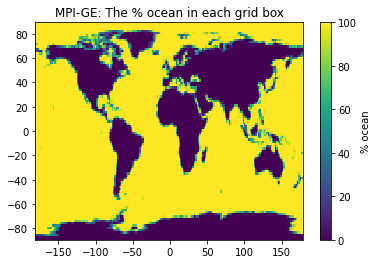

In [21]:
## visualize the % ocean at each grid point in the CanESM resolution 
plt.pcolormesh(mpi_tas.lon, mpi_tas.lat, mpi_percents, shading = 'auto')
plt.title('MPI-GE: The % ocean in each grid box')
plt.colorbar(label='% ocean')
plt.show()

In [34]:
## save this percent ocean data array that was created for MPI-GE into a file
np.savetxt(f'{pwd}\\Ocean_Percents_Grids\\MPI_OceanPercents.txt', mpi_percents)

In [35]:
## open the percent ocean data array that was created for CanESM2 from the numpy text file
mpi_percents = np.loadtxt(f'{pwd}\\Ocean_Percents_Grids\\MPI_OceanPercents.txt')
mpi_percents.shape

(96, 192)

In [10]:
mpi_tas

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 192, time: 3000)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2099-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 -180.0 -178.1 -176.2 -174.4 ... 174.4 176.2 178.1
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1850-01-01 1850-02-01 ... 2100-01-01
    lat_bnds   (lat, bnds) float64 -89.5 -87.65 -87.65 ... 87.65 87.65 89.5
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    tas        (time, lat, lon) float32 241.85086 241.78836 ... 269.65988

In [7]:
## view info about get_landsea_mask function, which uses the data of ocean percantage that was just created
alexas_functions.get_landsea_mask?

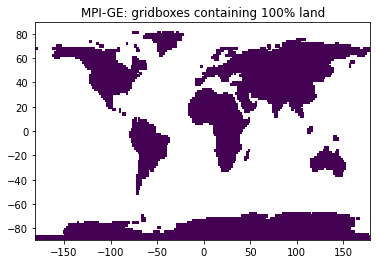

In [8]:
## create a 100% land mask using the % of ocean per grid box for the MPI
## (meaning, keep grid points that contain 100% land)

mpi_land100 = alexas_functions.get_landsea_mask(mpi_percents, perc_val=100)
plt.pcolormesh(mpi_tas.lon, mpi_tas.lat, mpi_land100, shading= 'auto') 
plt.title('MPI-GE: gridboxes containing 100% land')
plt.show()

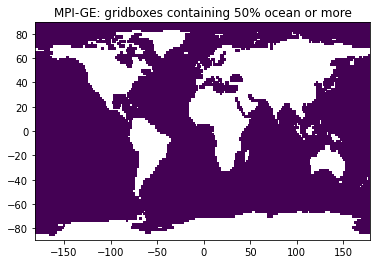

In [9]:
## create a 50% sea mask (meaning, keep grid points that contain 50% or greater ocean) for MPI-GE
mpi_sea50 = alexas_functions.get_landsea_mask(mpi_percents, perc_val=50, mtype='sea')
plt.pcolormesh(mpi_tas.lon, mpi_tas.lat, mpi_sea50, shading= 'auto')
plt.title('MPI-GE: gridboxes containing 50% ocean or more')
plt.show()

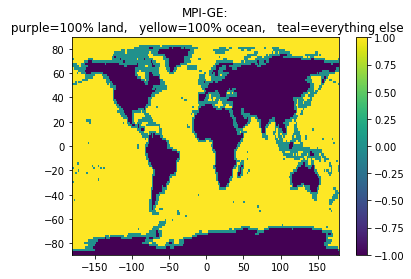

In [16]:
## create a 100% sea mask (meaning, keep grid points that contain 100% ocean)
## create a 100% land mask (meaning, keep grid points that contain 100% land)
## use these masks to get all the 'in between' aka 'coasts'

## using the nn='no' kwarg will input 0's instead of nan's 
## if the two masks had nans, the subtraction of the two masks would not work
mpi_sea100_0 = alexas_functions.get_landsea_mask(mpi_percents, perc_val=100, mtype='sea', nn='no')
mpi_lan100_0 = alexas_functions.get_landsea_mask(mpi_percents, perc_val=100, mtype='land', nn='no')

mpi_lcs100 = mpi_sea100_0 - mpi_lan100_0

plt.pcolormesh(mpi_tas.lon, mpi_tas.lat, mpi_lcs100, shading= 'auto')
plt.title('MPI-GE:\n purple=100% land,   yellow=100% ocean,   teal=everything else')
plt.colorbar()
plt.show()

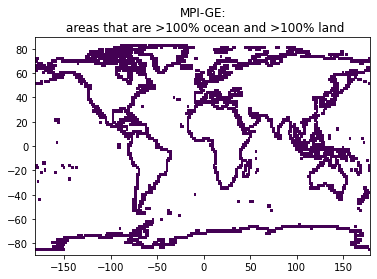

In [19]:
## show just the 'coasts' (aka, areas >100% ocean and >100% land)
mpi_coasts = mpi_lcs100.copy()
mpi_coasts[mpi_coasts == 1.]=np.nan
mpi_coasts[mpi_coasts ==-1.]=np.nan

plt.pcolormesh(mpi_tas.lon, mpi_tas.lat, mpi_coasts, shading= 'auto')
plt.title('MPI-GE:\n areas that are >100% ocean and >100% land')
plt.show()

### Make ocean % grids for other files , save the % masks so they can easily be accessed for calculating and applying a mask to the data, to mask out sea or land from the analysis

In [ ]:
had_percents = alexas_functions.calculate_percent_ocean_gridded(had_sat_sst)
np.savetxt(f'{pwd}\\Ocean_Percents_Grids\\Had_OceanPercents.txt', had_percents)

Making a data array of the % ocean area in each latlon grid box for the globe
with grid shape (lat, lon): (36, 72)

current latitude:
-87.5,  -82.5,  

In [33]:
can_tas_name = alexas_functions.get_filename('can_ensm', 'tas')
can_tas = xr.open_dataset(can_tas_name)
can_tas.close() 
can_tas = alexas_functions.uniform_coords(can_tas)

can_percents = alexas_functions.calculate_percent_ocean_gridded(can_tas)
np.savetxt(f'{pwd}\\Ocean_Percents_Grids\\Can_OceanPercents.txt',  can_percents)

Making a data array of the % ocean area in each latlon grid box for the globe
with grid shape (lat, lon): (64, 128)

current latitude:
-87.8638,  -85.09653,  -82.31291,  -79.52561,  -76.7369,  -73.94752,  -71.15775,  -68.36776,  -65.57761,  -62.78735,  -59.99702,  -57.20663,  -54.4162,  -51.62573,  -48.83524,  -46.04473,  -43.25419,  -40.46365,  -37.67309,  -34.88252,  -32.09194,  -29.30136,  -26.51077,  -23.72017,  -20.92957,  -18.13897,  -15.34836,  -12.55776,  -9.76715,  -6.97653,  -4.18592,  -1.39531,  1.39531,  4.18592,  6.97653,  9.76715,  12.55776,  15.34836,  18.13897,  20.92957,  23.72017,  26.51077,  29.30136,  32.09194,  34.88252,  37.67309,  40.46365,  43.25419,  46.04473,  48.83524,  51.62573,  54.4162,  57.20663,  59.99702,  62.78735,  65.57761,  68.36776,  71.15775,  73.94752,  76.7369,  79.52561,  82.31291,  85.09653,  87.8638,  ... done.
